In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Data Preprocessing

In [ ]:
# 1.1 Load Data set from the link

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "StudentsPerformance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "spscientist/students-performance-in-exams",
  file_path,

)


<ipython-input-3-ee1ed74ec589>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [ ]:
# 1.2 Handle missing values (if any).
# For missing value 1st we explore data set
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# 1.3 Encode categorical variables
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['reading score', 'writing score']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [ ]:
df_encoded.describe()

,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.704149e-17,7.105427e-18,7.105427e-18
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.360728e+00,-3.574960e+00,-3.822345e+00
25%,-5.997164e-01,-6.968462e-01,-6.784278e-01
50%,-5.872457e-03,5.694554e-02,6.228578e-02
75%,7.199368e-01,6.736842e-01,7.206978e-01
max,2.237538e+00,2.112741e+00,2.103363e+00


# 2. Feature Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Select features and target
features = ['reading score', 'writing score'] + [col for col in df_encoded.columns if col.startswith(('gender_', 'race/ethnicity_', 'parental level of education_', 'lunch_', 'test preparation course_'))]
X = df_encoded[features]
y = df_encoded['math score']

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original features shape:", X.shape)
print("Polynomial features shape:", X_poly.shape)
print("Polynomial feature names:", poly.get_feature_names_out(features))

Original features shape: (1000, 14)
Polynomial features shape: (1000, 119)
Polynomial feature names: ['reading score' 'writing score' 'gender_male' 'race/ethnicity_group B'
 'race/ethnicity_group C' 'race/ethnicity_group D'
 'race/ethnicity_group E' "parental level of education_bachelor's degree"
 'parental level of education_high school'
 "parental level of education_master's degree"
 'parental level of education_some college'
 'parental level of education_some high school' 'lunch_standard'
 'test preparation course_none' 'reading score^2'
 'reading score writing score' 'reading score gender_male'
 'reading score race/ethnicity_group B'
 'reading score race/ethnicity_group C'
 'reading score race/ethnicity_group D'
 'reading score race/ethnicity_group E'
 "reading score parental level of education_bachelor's degree"
 'reading score parental level of education_high school'
 "reading score parental level of education_master's degree"
 'reading score parental level of education_some coll

In [ ]:
X.head()

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


# 3. Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train Multilinear Regression
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_poly_train)

print("Multilinear Regression trained. Coefficients:", multi_model.coef_)
print("Polynomial Regression trained. Coefficients:", poly_model.coef_)

Multilinear Regression trained. Coefficients: [ 0.22726087  0.72570372  0.8620558   0.02370907 -0.04127988 -0.04046296
  0.32283    -0.04730304  0.0613185  -0.09240798  0.06590719  0.04991391
  0.23160408  0.21705936]
Polynomial Regression trained. Coefficients: [ 4.62872610e-01  4.87273986e-01  3.79214024e-01 -5.71398642e-02
 -1.08821947e-01 -8.04485196e-02  3.64676079e-02  1.93589442e-01
  1.40663477e-01  2.30252228e-01  1.83752834e-01  3.69716638e-02
  1.56826688e-01  4.98767844e-02  1.25074428e-01 -1.86852486e-01
 -9.14717601e-02 -2.36899580e-01 -3.19113861e-01 -3.16529203e-01
 -3.20682126e-01  2.63224014e-01  7.75073578e-02  5.70495439e-01
  1.37222416e-01  1.88340270e-01  5.80481070e-02 -1.27937055e-01
  7.41307004e-02  5.39514952e-02  4.74399942e-01  4.58844207e-01
  4.66484317e-01  5.25021109e-01 -3.69364634e-01 -1.99577893e-01
 -7.16217575e-01 -2.50846282e-01 -3.46643151e-01 -9.02578684e-02
  9.20008365e-02  3.79214024e-01  2.59812551e-01  2.36635416e-01
  1.02347105e-01  3.01

# 4. Model Evaluation

Multilinear Regression Metrics:
RMSE: 0.36, MAE: 0.28, R²: 0.88

Polynomial Regression Metrics:
RMSE: 0.38, MAE: 0.30, R²: 0.87


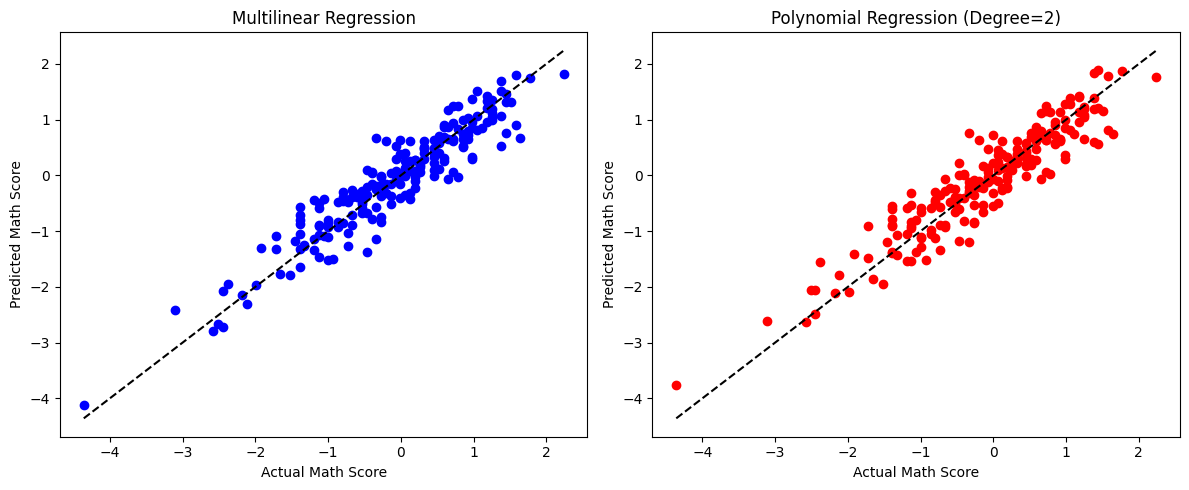


Overfitting Check:
Multilinear - Train R²: 0.87, Test R²: 0.88
Polynomial - Train R²: 0.89, Test R²: 0.87


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predictions
y_pred_multi = multi_model.predict(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

# Metrics for Multilinear Regression
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mae_multi = mean_absolute_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# Metrics for Polynomial Regression
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print metrics
print("Multilinear Regression Metrics:")
print(f"RMSE: {rmse_multi:.2f}, MAE: {mae_multi:.2f}, R²: {r2_multi:.2f}")
print("\nPolynomial Regression Metrics:")
print(f"RMSE: {rmse_poly:.2f}, MAE: {mae_poly:.2f}, R²: {r2_poly:.2f}")

# Visualize
plt.figure(figsize=(12, 5))

# Multilinear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_multi, color='blue')

# Diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Multilinear Regression')

# Polynomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Polynomial Regression (Degree=2)')

plt.tight_layout()
plt.show()

# Check overfitting
r2_train_multi = r2_score(y_train, multi_model.predict(X_train))
r2_train_poly = r2_score(y_poly_train, poly_model.predict(X_poly_train))
print("\nOverfitting Check:")
print(f"Multilinear - Train R²: {r2_train_multi:.2f}, Test R²: {r2_multi:.2f}")
print(f"Polynomial - Train R²: {r2_train_poly:.2f}, Test R²: {r2_poly:.2f}")

Multilinear Regression: The model explains 87% of the variance in the training data and 88% in the test data. The slightly higher test R² suggests good generalization, with no significant overfitting or underfitting.

Polynomial Regression: The model explains 89% of the training variance and 87% of the test variance. The slightly lower test R² compared to training indicates minor overfitting, as the model captures more complex patterns (e.g., interactions) but is less generalizable. The degree=2 polynomial adds flexibility but risks fitting noise.

Comparison: Both models perform similarly (R² ~0.87–0.88), but Multilinear Regression generalizes better (test R² > train R²). Polynomial Regression’s slight overfitting suggests that the added complexity (polynomial terms) may not be fully justified for this dataset.